# Comparing with atmospheric spectra

In [1]:
import urllib
from species import SpeciesInit
from species.data.database import Database
from species.fit.compare_spectra import CompareSpectra
from species.read.read_model import ReadModel
from species.plot.plot_comparison import plot_grid_statistic, plot_model_spectra
from species.plot.plot_spectrum import plot_spectrum
from species.util.box_util import update_objectbox
from species.util.fit_util import get_residuals

In [2]:
urllib.request.urlretrieve('https://home.strw.leidenuniv.nl/~stolker/species/spectra/HD206893C_GRAVITYK_fluxcal_spectrum.fits',
                           'HD206893C_GRAVITYK_fluxcal_spectrum.fits')

('HD206893C_GRAVITYK_fluxcal_spectrum.fits',
 <http.client.HTTPMessage at 0x15979f150>)

In [3]:
SpeciesInit()

species v0.8.3

Working folder: /Users/tomasstolker/applications/species/docs/tutorials

Creating species_config.ini... [DONE]
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]

Configuration settings:
   - Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
   - Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


[cosmos.home:07624] shmem: mmap: an error occurred while determining whether or not /var/folders/4y/qx08nc451nn_ggz7r2vngb140000gn/T//ompi.cosmos.501/jf.0/2712862720/sm_segment.cosmos.501.a1b30000.0 could be created.


In [4]:
database = Database()

In [5]:
database.add_object(object_name='HD 206893 c',
                    parallax=(24.53, 0.04),
                    spectrum={'GRAVITY': ('./HD206893C_GRAVITYK_fluxcal_spectrum.fits',
                                          './HD206893C_GRAVITYK_fluxcal_spectrum.fits',
                                          500.)})


----------
Add object
----------

Object name: HD 206893 c
Units: None
Deredden: None
Parallax (mas) = 24.53 +/- 0.04

Spectra:
   - GRAVITY spectrum:
      - Object: HD 206893 C
      - Database tag: GRAVITY
      - Filename: ./HD206893C_GRAVITYK_fluxcal_spectrum.fits
      - Data shape: (214, 3)
      - Wavelength range (um): 2.01 - 2.48
      - Mean flux (W m-2 um-1): 1.89e-16
      - Mean error (W m-2 um-1): 2.43e-17
   - GRAVITY covariance matrix:
      - Object: HD 206893 C
      - Database tag: GRAVITY
      - Filename: ./HD206893C_GRAVITYK_fluxcal_spectrum.fits
      - Data shape: (214, 214)
   - Instrument resolution:
      - GRAVITY: 500.0


In [6]:
database.add_model('drift-phoenix', teff_range=(1000., 2000.))


-------------------------
Add grid of model spectra
-------------------------

Database tag: drift-phoenix
Model name: DRIFT-PHOENIX


100%|███████████████████████████████████████| 240M/240M [00:00<00:00, 83.6GB/s]
SHA256 hash of downloaded file: ba71a5e4d3d399a6f8ae249590c2e174e90ec2b55e712d350dad8ca1ae83a907
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.



Unpacking 259/496 model spectra from DRIFT-PHOENIX (229 MB)... [DONE]

Please cite Helling et al. (2008) when using DRIFT-PHOENIX in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2008ApJ...675L.105H

Wavelength range (um) = 0.1 - 50
Sampling (lambda/d_lambda) = 4000
Teff range (K) = 1000.0 - 2000.0

Adding DRIFT-PHOENIX model spectra... drift-phoenix_teff_2000_logg_5.5_feh_0.3_spec.dat 

Grid points stored in the database:
   - Teff = [1000. 1100. 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000.]
   - log(g) = [3.  3.5 4.  4.5 5.  5.5]
   - [Fe/H] = [-0.6 -0.3 -0.   0.3]

Number of grid points per parameter:
   - teff: 11
   - logg: 6
   - feh: 4

Fix missing grid points with a linear interpolation:
   - teff = 1200.0, logg = 5.0, feh = -0.6
   - teff = 1600.0, logg = 3.0, feh = 0.3
   - teff = 1600.0, logg = 5.5, feh = 0.3
   - teff = 1900.0, logg = 4.5, feh = 0.3
   - teff = 1900.0, logg = 5.5, feh = 0.3

Number of stored grid points: 264
Number of interpolated

/Users/tomasstolker/applications/species/species/util/data_util.py:393: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


In [7]:
compare = CompareSpectra(object_name='HD 206893 c',
                         spec_name=['GRAVITY'])

In [8]:
compare.compare_model(tag='hd206893c',
                      model='drift-phoenix',
                      av_points=None,
                      fix_logg=None,
                      scale_spec=None,
                      weights=False,
                      inc_phot=False)

Processing model spectrum 264/264... [DONE]
Best-fit parameters:
   - Goodness-of-fit = 4.62e+02
   - teff = 1100.0
   - logg = 3.5
   - feh = 0.3
   - Radius (Rjup) = 1.72
   - Scaling = 9.53e-21


Plotting goodness-of-fit of model grid...

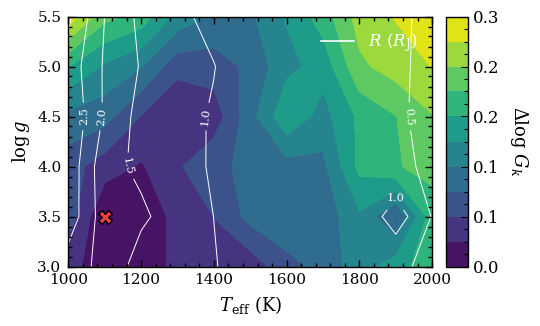

 [DONE]


In [9]:
fig = plot_grid_statistic(tag='hd206893c',
                          upsample=False,
                          offset=None,
                          output=None,
                          extra_param='radius',
                          nlevels_main=10,
                          nlevels_extra=5)

Plotting model spectra comparison...

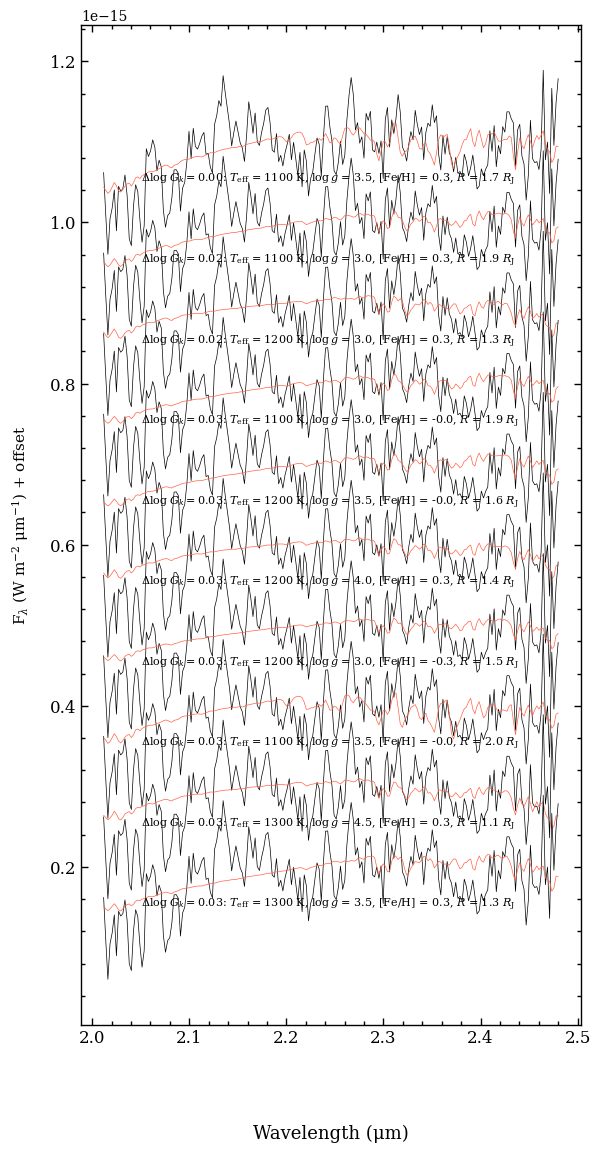

 [DONE]


In [10]:
fig = plot_model_spectra(tag='hd206893c',
                         n_spectra=10,
                         flux_offset=1e-16,
                         label_pos=(2.05, 1.5e-16),
                         xlim=None,
                         ylim=None,
                         title=None,
                         offset=None,
                         figsize=(5., 10.),
                         output=None,
                         leg_param=['teff', 'logg', 'feh', 'radius'])

In [11]:
best = database.get_compare_sample('hd206893c')


------------------------------
Get best comparison parameters
------------------------------

Database tag: hd206893c

Parameters:
   - teff = 1100.00
   - logg = 3.50
   - feh = 0.30
   - parallax = 24.53
   - radius = 1.72


In [12]:
object_box = database.get_object(object_name='HD 206893 c',
                                 inc_phot=False,
                                 inc_spec=True)


----------
Get object
----------

Object name: HD 206893 c
Include photometry: False
Include spectra: True


In [13]:
read_model = ReadModel('drift-phoenix')
model_box = read_model.get_model(best, spec_res=500.)

In [14]:
residuals = get_residuals(datatype='model',
                          spectrum='drift-phoenix',
                          parameters=best,
                          objectbox=object_box,
                          inc_phot=False,
                          inc_spec=True)


-------------------
Calculate residuals
-------------------

Data type: model
Spectrum name: drift-phoenix

Include photometry: False
Include spectra: True

Parameters:
   - teff = 1100.00
   - logg = 3.50
   - feh = 0.30
   - parallax = 24.53
   - radius = 1.72
   - luminosity = 4.11e-05
   - mass = 3.76

Residuals (sigma):
   - GRAVITY: min = -3.41, max = 4.63

Reduced chi2 = 2.21
Number of degrees of freedom = 209



-------------
Plot spectrum
-------------

Boxes:
   - ModelBox
   - ObjectBox

Object type: planet
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: None

Figure size: (6.0, 3.0)
Legend parameters: None
Include model name: False


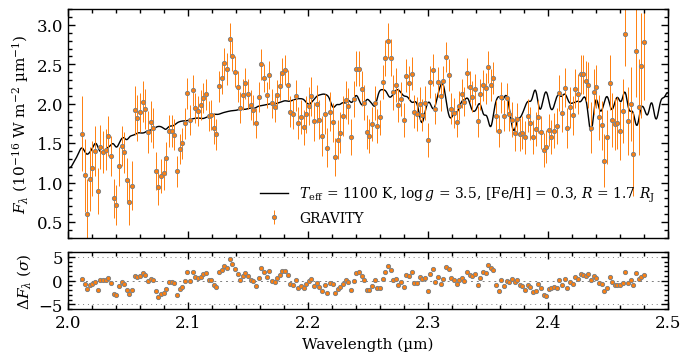

In [15]:
fig = plot_spectrum(boxes=[model_box, object_box],
                    filters=None,
                    residuals=residuals,
                    plot_kwargs=[{'ls': '-', 'lw': 1., 'color': 'black'},
                                 {'GRAVITY': {'marker': 'o', 'ms': 3., 'elinewidth': 0.7, 'mew': 0.7, 'mec': 'gray', 'color': 'tab:orange', 'ls': 'none', 'label': 'GRAVITY'}}],
                    xlim=(2.0, 2.5),
                    ylim=(0.3e-16, 3.2e-16),
                    scale=('linear', 'linear'),
                    legend={'loc': 'lower right', 'frameon': False, 'fontsize': 10.},
                    quantity='flux density',
                    output=None)